# 02 Deep Q agent

#### 👉 Let's use a neural network model to approximate the Q function.

#### 👉Neural networks are usually highly-parametric models that are able to fit complex patterns between the input features and the target.

#### 👉 The type of neural network we will use is a Multi Layer Perceptron (MLP).

#### 👉MLPs are stacks of linear models, interleaved with so called activation functions.

In [16]:
%load_ext autoreload
%autoreload 2
%pylab inline
%config InlineBackend.figure_format = 'svg'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Populating the interactive namespace from numpy and matplotlib


## Environment 🌎

In [17]:
import gym
env = gym.make('CartPole-v1')

## Tensorboard ON 📈

In [18]:
%load_ext tensorboard
%tensorboard --logdir ../tensorboard_logs

## Train the agent 🏋️

You can also do this from the command line
```
python ../src/q_agent.py --env CartPole-v1 --seed 145 --normalize_state
```

In [19]:
from src.utils import load_default_hyperparameters
hparams = load_default_hyperparameters(env_name='CartPole-v1')
hparams

{'learning_rate': 0.0023,
 'discount_factor': 0.99,
 'batch_size': 64,
 'memory_size': 100000,
 'freq_steps_train': 256,
 'freq_steps_update_target': 10,
 'n_steps_warm_up_memory': 1000,
 'max_grad_norm': 10,
 'n_gradient_steps': 128,
 'steps_epsilon_decay': 6000,
 'epsilon_start': 0.9,
 'epsilon_end': 0.05,
 'nn_hidden_layers': [256, 256],
 'normalize_state': True}

In [20]:
from src.q_agent import QAgent
agent = QAgent(env, **hparams)

67,586 parameters


In [21]:
from src.loops import train

from src.utils import get_agent_id
agent_id = get_agent_id('CartPole-v1')

from src.config import TENSORBOARD_LOG_DIR
train(agent,
      env,
      n_episodes=1000,
      log_dir=TENSORBOARD_LOG_DIR / 'CartPole-v1' / agent_id,
      n_episodes_evaluate_agent=100,
      freq_episodes_evaluate_agent=200)

 20%|███            | 201/1000 [00:07<01:00, 13.27it/s]

Reward mean: 27.6, std: 3.815756805667782
Num steps mean: 27.6, std: 3.815756805667782
Success rate: 0.00%


 40%|██████         | 401/1000 [00:56<05:19,  1.88it/s]

Reward mean: 93.24, std: 7.280274720091268
Num steps mean: 93.24, std: 7.280274720091268
Success rate: 0.00%


 60%|█████████      | 601/1000 [01:58<02:42,  2.46it/s]

Reward mean: 98.57, std: 2.566144968625116
Num steps mean: 98.57, std: 2.566144968625116
Success rate: 0.00%


 80%|████████████   | 801/1000 [02:46<03:09,  1.05it/s]

Reward mean: 127.66, std: 13.928546227083427
Num steps mean: 127.66, std: 13.928546227083427
Success rate: 0.00%


100%|██████████████| 1000/1000 [03:41<00:00,  4.51it/s]


## Evaluate the agent ⏱️

In [28]:
from src.loops import evaluate

from src.q_agent import QAgent
from src.config import SAVED_AGENTS_DIR

agent_id = 8
agent = QAgent.load_from_disk(env, SAVED_AGENTS_DIR / 'CartPole-v1' / str(agent_id))

67,586 parameters


In [29]:
rewards, steps = evaluate(
    agent, env,
    n_episodes=100,
    epsilon=0.01
)

100%|████████████████| 100/100 [00:01<00:00, 63.10it/s]


## Let's see how far we got in each attempt

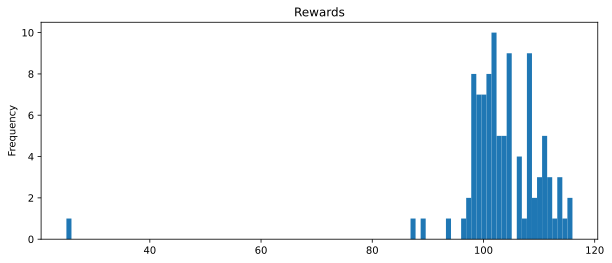

In [30]:
import matplotlib.pyplot as plt
import pandas as pd

fig, ax = plt.subplots(figsize = (10, 4))
ax.set_title("Rewards")    
pd.Series(rewards).plot(kind='hist', bins=100)

plt.show()

## Let's see our agent in action 🎬

In [39]:
from src.viz import show_video

show_video(agent, env, sleep_sec=0.01)